In [20]:
%matplotlib notebook
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import seaborn as sns
import colorlover as cl

py.offline.init_notebook_mode(connected=True)

In [2]:
fname0 = '../../../../../Analysis/mom/FAMOS_GS/Analysis/data/ITU-MOM/ITU-MOM_GSexps_1980_2009.nc'
ds0 = xr.open_mfdataset(fname0)

fname1 = '../../../../../Analysis/mom/FAMOS_GS/Analysis/data/MITB500/MIT_MITB500_1980_2009.nc'
ds1 = xr.open_mfdataset(fname1)

fname2 = '../../../../../Analysis/mom/FAMOS_GS/Analysis/data/Brest/Brest_GSexps_1980_2009.nc'
ds2 = xr.open_mfdataset(fname2)

fname3 = '../../../../../Analysis/mom/FAMOS_GS/Analysis/data/NorESM/NorESM_GS_experiments_1980_2009.nc'
ds3 = xr.open_mfdataset(fname3)

fname4 = '../../../../../Analysis/mom/FAMOS_GS/Analysis/data/FESOM/FESOM_GS_exps_1980_2009.nc'
ds4 = xr.open_mfdataset(fname4)

In [3]:
dates0 = pd.date_range('1980-01', freq='M', periods=12*29)
ds0['time'] = dates0
ds1['time'] = dates0
ds2['time'] = dates0
ds3['time'] = dates0
ds4['time'] = dates0

In [35]:
""" Plot annual mean of volume fluxes anomaly"""
modelnames = ['ITU' , 'MITB500', 'Brest', 'NorESM', 'FESOM']
colors = ['blue', 'darkorange', 'red', 'green', 'cyan']
#colors2 = sns.color_palette("Paired", n_colors=10)
colors2 = cl.scales['10']['qual']['Paired'];  # make paired twice the amount of models

# names of the control, gsp and gsn variables [total]
ctln = ['ctlbarents_volumeinflow', 'barvt_c[1]', 'BSOrefvolume_in', 'inflow_vt_NorESM_BSO_ctrl', 'ctlvoltransp_BSO_in']
gspn = ['gspbarents_volumeinflow', 'barvt_gsp[1]', 'BSOgspvolume_in', 'inflow_vt_NorESM_BSO_gsp', 'gspvoltransp_BSO_in']
gsnn = ['gsnbarents_volumeinflow', 'barvt_gsm[1]', 'BSOgsnvolume_in', 'inflow_vt_NorESM_BSO_gsn', 'gsnvoltransp_BSO_in']

ctlhn = ['ctlbarents_heatinflow', 'barht_c[1]', 'BSOrefheat_in', 'inflow_ht_NorESM_BSO_ctrl', 'ctlheattransp_BSO_in']
gsphn = ['gspbarents_heatinflow', 'barht_gsp[1]', 'BSOgspheat_in', 'inflow_ht_NorESM_BSO_gsp', 'gspheattransp_BSO_in']
gsnhn = ['gsnbarents_heatinflow', 'barht_gsm[1]', 'BSOgsnheat_in', 'inflow_ht_NorESM_BSO_gsn', 'gsnheattransp_BSO_in']


coeffs = [1, 1e-6, 1, 1, 1]

layout = go.Layout(
    title='<b>Annual Inflow Transport Anomaly @BSO</b>',
    yaxis=dict(
        title='Heat Transport [TW]',
        #range=[-14, 14]
    ),
    xaxis=dict(
        title='Volume Transport [Sv]'
    )
)    


def update_plot(models):
    
    datap = []
    datan = []
    for ind,mdl in enumerate(models):
        dnm = 'ds'+np.str(ind)+'.'+ctln[ind]+'.groupby(\'time.year\').mean().year'
        time = np.copy(eval(dnm))
        dnm = 'ds'+np.str(ind)+'.'+ctln[ind]+'.groupby(\'time.year\').mean()'
        dnm2 = 'ds'+np.str(ind)+'.'+gspn[ind]+'.groupby(\'time.year\').mean()'
        dnm3 = 'ds'+np.str(ind)+'.'+gsnn[ind]+'.groupby(\'time.year\').mean()'
        val1 = np.copy(eval(dnm2)-eval(dnm))*coeffs[ind]
        val2 = np.copy(eval(dnm3)-eval(dnm))*coeffs[ind]
        dnm = 'ds'+np.str(ind)+'.'+ctlhn[ind]+'.groupby(\'time.year\').mean()'
        dnm2 = 'ds'+np.str(ind)+'.'+gsphn[ind]+'.groupby(\'time.year\').mean()'
        dnm3 = 'ds'+np.str(ind)+'.'+gsnhn[ind]+'.groupby(\'time.year\').mean()'
        val3 = np.copy(eval(dnm2)-eval(dnm))
        val4 = np.copy(eval(dnm3)-eval(dnm))
        trace1 = go.Scatter(            
            x = val1,
            y = val3,
            mode = 'lines',
            name = mdl+'-GSP',
            line = dict(
                width = 2.5,
                #color = colors[ind],
                color = colors2[2*ind],
                dash = 'dot',
                shape = 'smooth'
            )
        )
        datap.append(trace1)
        trace2 = go.Scatter(            
            x = val2,
            y = val4,
            mode = 'lines',
            name = mdl+'-GSM',
            line = dict(
                width = 2.5,
                #color = colors[ind],
                color = colors2[2*ind+1],
                dash = 'dot',
                shape = 'smooth'
            )
        )
        datan.append(trace2)


   
    data = datap + datan
    
    fig = go.Figure(data=data, layout=layout)
    py.offline.iplot(fig)
    
    
update_plot(modelnames)
#models = widgets.SelectMultiple(options=list(modelnames), value=modelnames, description='Models')    
#widgets.interactive(update_plot,models=models)

In [37]:
""" Plot seasonal mean of volume fluxes anomaly"""
modelnames = ['ITU' , 'MITB500', 'Brest', 'NorESM', 'FESOM']
colors = ['blue', 'darkorange', 'red', 'green', 'cyan']
colors2 = cl.scales['10']['qual']['Paired']; # make paired twice the amount of models

# names of the control, gsp and gsn variables [total]
ctln = ['ctlbarents_volumeinflow', 'barvt_c[1]', 'BSOrefvolume_in', 'inflow_vt_NorESM_BSO_ctrl', 'ctlvoltransp_BSO_in']
gspn = ['gspbarents_volumeinflow', 'barvt_gsp[1]', 'BSOgspvolume_in', 'inflow_vt_NorESM_BSO_gsp', 'gspvoltransp_BSO_in']
gsnn = ['gsnbarents_volumeinflow', 'barvt_gsm[1]', 'BSOgsnvolume_in', 'inflow_vt_NorESM_BSO_gsn', 'gsnvoltransp_BSO_in']

ctlhn = ['ctlbarents_heatinflow', 'barht_c[1]', 'BSOrefheat_in', 'inflow_ht_NorESM_BSO_ctrl', 'ctlheattransp_BSO_in']
gsphn = ['gspbarents_heatinflow', 'barht_gsp[1]', 'BSOgspheat_in', 'inflow_ht_NorESM_BSO_gsp', 'gspheattransp_BSO_in']
gsnhn = ['gsnbarents_heatinflow', 'barht_gsm[1]', 'BSOgsnheat_in', 'inflow_ht_NorESM_BSO_gsn', 'gsnheattransp_BSO_in']


coeffs = [1, 1e-6, 1, 1, 1]

layout = go.Layout(
    title='<b>Monthly Inflow Transport Anomaly @BSO</b>',
    yaxis=dict(
        title='Heat Transport [TW]',
        #range=[-14, 14]
    ),
    xaxis=dict(
        title='Volume Transport [Sv]'
    )
)    


def update_plot(models):
    
    datap = []
    datan = []
    for ind,mdl in enumerate(models):
        dnm = 'ds'+np.str(ind)+'.'+ctln[ind]+'.groupby(\'time.month\').mean().month'
        time = np.copy(eval(dnm))
        dnm = 'ds'+np.str(ind)+'.'+ctln[ind]+'.groupby(\'time.month\').mean()'
        dnm2 = 'ds'+np.str(ind)+'.'+gspn[ind]+'.groupby(\'time.month\').mean()'
        dnm3 = 'ds'+np.str(ind)+'.'+gsnn[ind]+'.groupby(\'time.month\').mean()'
        val1 = np.copy(eval(dnm2)-eval(dnm))*coeffs[ind]
        val2 = np.copy(eval(dnm3)-eval(dnm))*coeffs[ind]
        dnm = 'ds'+np.str(ind)+'.'+ctlhn[ind]+'.groupby(\'time.month\').mean()'
        dnm2 = 'ds'+np.str(ind)+'.'+gsphn[ind]+'.groupby(\'time.month\').mean()'
        dnm3 = 'ds'+np.str(ind)+'.'+gsnhn[ind]+'.groupby(\'time.month\').mean()'
        val3 = np.copy(eval(dnm2)-eval(dnm))
        val4 = np.copy(eval(dnm3)-eval(dnm))
        trace1 = go.Scatter(            
            x = val1,
            y = val3,
            mode = 'lines',
            name = mdl+'-GSP',        
            line = dict(
                width = 4,
                #color = colors[ind],
                color = colors2[2*ind],
                dash = 'dot',
                shape = 'smooth'
            )
        )
        datap.append(trace1)
        trace2 = go.Scatter(            
            x = val2,
            y = val4,
            mode = 'lines',
            name = mdl+'-GSM',            
            line = dict(
                width = 4,
                #color = colors[ind],
                color = colors2[2*ind+1],
                dash = 'dot',
                shape = 'smooth'
            )
        )
        datan.append(trace2)


   
    data = datap + datan
    
    fig = go.Figure(data=data, layout=layout)
    py.offline.iplot(fig)
    
update_plot(modelnames)    
#models = widgets.SelectMultiple(options=list(modelnames), value=modelnames, description='Models')    
#widgets.interactive(update_plot,models=models)

In [51]:
ds1.time

<xarray.DataArray 'time' (time: 348)>
array(['1980-01-31T00:00:00.000000000', '1980-02-29T00:00:00.000000000',
       '1980-03-31T00:00:00.000000000', ..., '2008-10-31T00:00:00.000000000',
       '2008-11-30T00:00:00.000000000', '2008-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1980-01-31 1980-02-29 1980-03-31 ...

(348,)


<IPython.core.display.Javascript object>


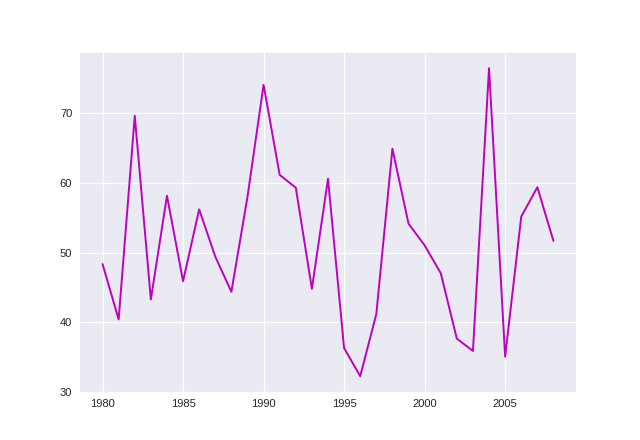

In [134]:
#aa=(ds2.Beringgsnvolume_in['time.month']==12)
aa=(ds2['time.month']==12)
#print ds2.Beringgsnvolume_in.shape
print aa.shape
#print ds2.Beringgsnvolume_in[aa]
plt.figure()
plt.plot(ds2.BSOgsnheat.groupby('time.year').mean().year, ds2.BSOgsnheat[ds2['time.month']==12],'m')
#plt.plot(ds1.berst_gsp[ds1['time.month']==12])

In [133]:
aa=ds2.BSOgsnheat.groupby('time.year').mean().year
print aa

<xarray.DataArray 'year' (year: 29)>
array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008])
Coordinates:
  * year     (year) int64 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 ...
